# BTC-USD Dataset

The dataset used in this project was manually downloaded from https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD for period November 24, 2020 to November 24, 2021. The dataset was downloaded to a .CSV file which will be used in this notebook below.  

In [154]:
#Loading the necessary libraries for this exercise
import pandas as pd
import os

#Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Get Current Working Directory
os.getcwd()

#Change Working Directory
os.chdir('C:/Users/User/Documents/Data Science Texas Tech')
os.getcwd()

#Specify dataset directory
path = 'C:/Users/User/Documents/Data Science Texas Tech/BTC-USD Analysis & Visualization/'

#Import BTC-USD data
df = pd.DataFrame(pd.read_csv(path + 'BTC-USD.csv'))

#Checking out the first few rows of the dataset
print(df.head())


         Date         Open         High          Low        Close  \
0  11/24/2020  18365.01563  19348.27148  18128.65625  19107.46484   
1  11/25/2020  19104.41016  19390.96484  18581.14648  18732.12109   
2  11/26/2020  18729.83984  18866.28516  16351.03516  17150.62305   
3  11/27/2020  17153.91406  17445.02344  16526.42383  17108.40234   
4  11/28/2020  17112.93359  17853.93945  16910.65234  17717.41406   

     Adj Close        Volume  
0  19107.46484  5.146957e+10  
1  18732.12109  4.371036e+10  
2  17150.62305  6.139684e+10  
3  17108.40234  3.888649e+10  
4  17717.41406  3.260104e+10  


In [155]:
# Checking out the type of data in the BTC-USD dataset
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


##### the data type of the date column is currently set as an object. We will convert it to datetime format later

In [156]:
#Checking the shape (# of rows, and columns) in the dataset
print(df.shape)

(366, 7)


## Data Preparation and Cleaning
<ol>
    <li>The dataset has 7 columns showing daily BTC-USD price&nbsp;</li>
    <li>The columns are Open, High, Low, Close, Adj Close prices and Volume</li>
    <li>Data is provided for 366 days: for period November 24, 2020 to November 24, 2021</li>
    <li>The next steps will check if there are misssing or invalid data </li>
</ol>

In [157]:
#Check for any null values in the dataset
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [158]:
#Check for how many rows have null values
df.loc[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
364,11/23/2021,NaN,NaN,NaN,NaN,NaN,NaN


##### Only row 364 has Null values. This row will be dropped from the dataset

In [159]:
df_new = df.dropna(axis = 0, how = 'any')

In [160]:
df_new.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### Row 364 has been dropped

In [135]:
df_new.shape

(365, 7)

##### Let's convert the Date colum to datetime using pd.to_datetime

In [136]:
df_new['Date'] = pd.to_datetime(df_new['Date'])

<ipython-input-136-2a034a087469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'])


In [137]:
df_new['Date'].iloc[2]

Timestamp('2020-11-26 00:00:00')

##### Let's drop the adjusted close column. Didn't notice any difference between it and the close column

In [138]:
df_new.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
65,2021-01-28,30441.04102,31891.30078,30023.20703,31649.60547,31649.60547,7.894816e+10


In [139]:
df_new.drop(columns= ['Adj Close'], axis = 1, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [140]:
df_new.head()

,Date,Open,High,Low,Close,Volume
0,2020-11-24,18365.01563,19348.27148,18128.65625,19107.46484,5.146957e+10
1,2020-11-25,19104.41016,19390.96484,18581.14648,18732.12109,4.371036e+10
2,2020-11-26,18729.83984,18866.28516,16351.03516,17150.62305,6.139684e+10
3,2020-11-27,17153.91406,17445.02344,16526.42383,17108.40234,3.888649e+10
4,2020-11-28,17112.93359,17853.93945,16910.65234,17717.41406,3.260104e+10


##### Let's extract the Year, Month and Day Columns from Date

In [141]:
#Extracting the Month from Date Column
df_new['Month'] = pd.DatetimeIndex(df_new.Date).month

<ipython-input-141-208ed14550ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Month'] = pd.DatetimeIndex(df_new.Date).month


In [142]:
#Extracting the Year from Date Column
df_new['Year'] = pd.DatetimeIndex(df_new.Date).year

<ipython-input-142-889cb2fbbf9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Year'] = pd.DatetimeIndex(df_new.Date).year


In [143]:
#Extracting the days from Date Column
df_new['Day'] = pd.DatetimeIndex(df_new.Date).day

<ipython-input-143-2edcf34c83fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Day'] = pd.DatetimeIndex(df_new.Date).day


##### Add new column 'Percent Change'

In [144]:
df_new['PercentChange'] = (df_new['Close']-df_new['Open'])/(df_new['Open'])*100

<ipython-input-144-31b17c6ec7d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PercentChange'] = (df_new['Close']-df_new['Open'])/(df_new['Open'])*100


##### Reorder the columns

In [145]:
df_new = df_new[['Date', 'Year', 'Month', 'Day', 'Open', 'Close',  'PercentChange','High', 'Low','Volume']]

In [146]:
df_new.head()

,Date,Year,Month,Day,Open,Close,PercentChange,High,Low,Volume
0,2020-11-24,2020,11,24,18365.01563,19107.46484,4.042737,19348.27148,18128.65625,5.146957e+10
1,2020-11-25,2020,11,25,19104.41016,18732.12109,-1.948707,19390.96484,18581.14648,4.371036e+10
2,2020-11-26,2020,11,26,18729.83984,17150.62305,-8.431555,18866.28516,16351.03516,6.139684e+10
3,2020-11-27,2020,11,27,17153.91406,17108.40234,-0.265314,17445.02344,16526.42383,3.888649e+10
4,2020-11-28,2020,11,28,17112.93359,17717.41406,3.532302,17853.93945,16910.65234,3.260104e+10


## Exploratory Analysis and Visualization of the BTC-USD Dataset
<ol>
    <li> Explore the distribution of the Open & Close price of BTC-USD with histograms</li>
    <li> Visualize the close price over time </li>
    <li> Visualize the average traded volume each month</li>
    
</ol>

In [147]:
# Import necessary libraries to visualize the data

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#Allows the plot to be displayed next to the code
%matplotlib inline

#Formating the plots
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Distribution of Open/Close price of BTC-USD

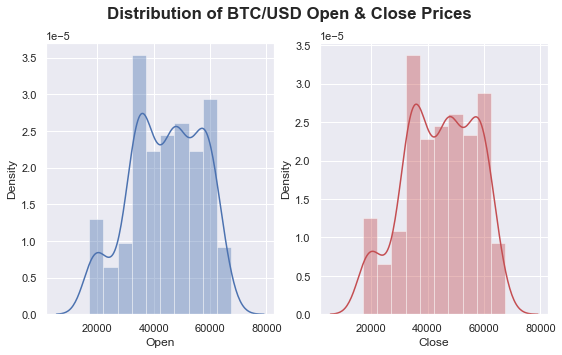

In [148]:
# Plot the histograms of the BTC/USD Open & Close Prices next to each other


fig,axes=plt.subplots(1,2)
sns.distplot(df_new.Open,color = "b", ax=axes[0], bins = 10)
plt.grid(True)
sns.distplot(df_new.Close,color = "r", ax=axes[1], bins = 10)
fig.suptitle('Distribution of BTC/USD Open & Close Prices',fontweight ="bold")
plt.show()



In [149]:
Month_Grouped = df_new.groupby(['Month']).mean()
print(Month_Grouped)

              Year        Day          Open         Close  PercentChange  \
Month                                                                      
1      2021.000000  16.000000  34652.961695  34703.053429       0.313243   
2      2021.000000  14.500000  45874.967217  46306.798967       1.247759   
3      2021.000000  16.000000  54544.678177  54998.008695       0.941784   
4      2021.000000  15.500000  57251.256250  57206.720053      -0.016304   
5      2021.000000  16.000000  47105.828503  46443.286669      -1.229427   
6      2021.000000  15.500000  35920.546941  35845.154688      -0.081369   
7      2021.000000  16.000000  34234.212451  34444.973792       0.599054   
8      2021.000000  16.000000  45516.119835  45709.022682       0.487426   
9      2021.000000  15.500000  46041.859376  45939.771485      -0.146678   
10     2021.000000  16.000000  57344.743951  57911.970516       1.153143   
11     2020.766667  15.533333  51870.387762  51702.946289      -0.076140   
12     2020.

##### Average Traded Volume by Month
The graph below will show the average volume traded each month during the period. Error bars are shown on each bar as well

Month
1     6.954533e+10
2     8.096972e+10
3     5.423175e+10
4     6.148273e+10
5     6.376108e+10
6     3.965492e+10
7     2.642269e+10
8     3.273143e+10
9     3.673799e+10
10    3.719606e+10
11    3.729318e+10
12    3.910515e+10
Name: Volume, dtype: float64


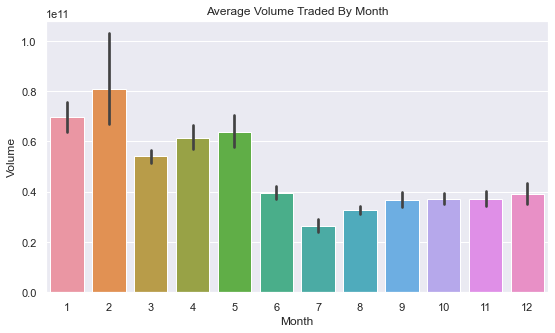

In [150]:
sns.barplot('Month', 'Volume', data = df_new)
plt.title ("Average Volume Traded By Month")

#checking out the mean volume by month
print(df_new.groupby(['Month']).mean()['Volume'])

same chart above without the error bars

Text(0.5, 1.0, 'Average Volume Traded By Month')

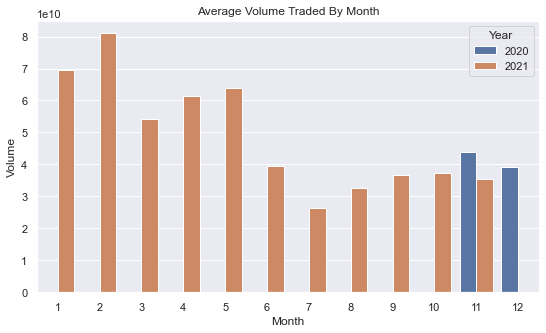

In [151]:
sns.barplot('Month', 'Volume', data = df_new,hue = 'Year', ci= False)
plt.title ("Average Volume Traded By Month")

##### Close price visualization over time

The next visualization will show how the BTC-USD price changed over  time

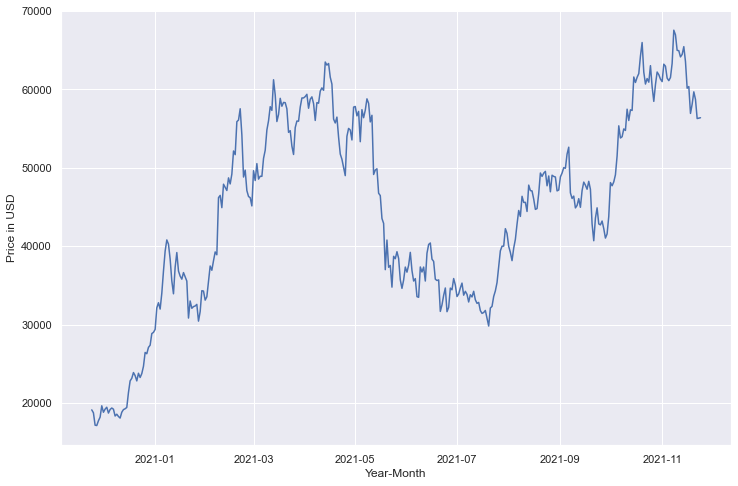

In [152]:
fig, ax=plt.subplots(figsize=(12,8))
plt.plot(df_new['Date'], df_new['Close'])
plt.xlabel('Year-Month')
plt.ylabel('Price in USD')
plt.show()

##### Volume visualization over time

The next visualization will show how the volume changed over time. As shown below, we can see the the spiked significantly just before March 2021.

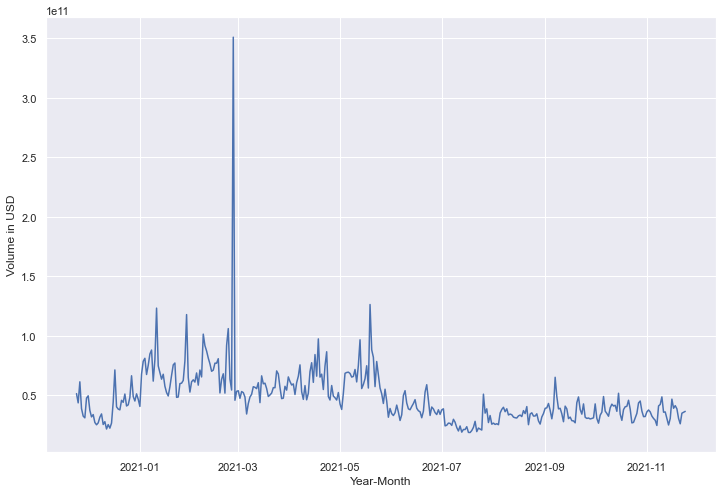

In [153]:
fig, ax=plt.subplots(figsize=(12,8))
plt.plot(df_new['Date'], df_new['Volume'])
plt.xlabel('Year-Month')
plt.ylabel('Volume in USD')
plt.show()

##### Creating a combo chart i.e. barplot representing volume trades, line plot representing BTC-USD price)

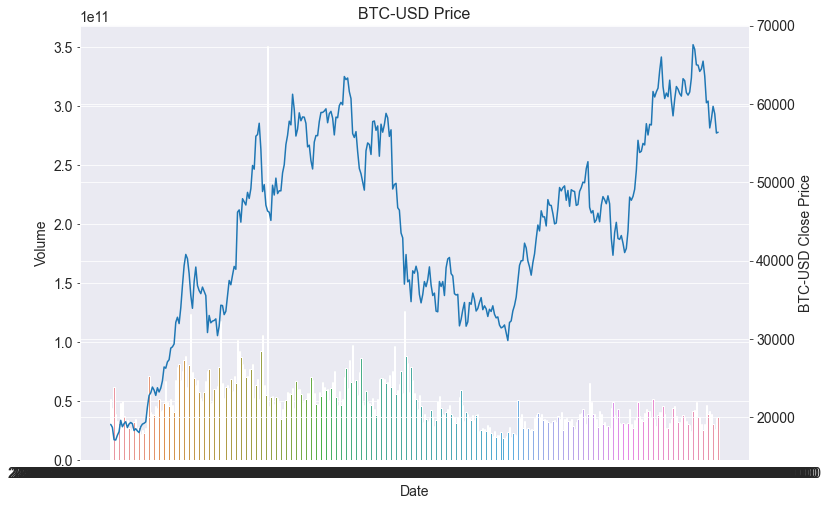

In [74]:
#Create a combo chart
fig, ax1=plt.subplots(figsize=(12,8))


#Combo chart title & label
ax1.set_title('BTC-USD Price', fontsize=16)


#Barplot creation
ax1 = sns.barplot(x='Date', y='Volume', data = df_new)

#creating twin axes to share the same x-axis
ax2 = ax1.twinx()

#lineplot creation
ax2 = sns.lineplot(ax1.get_xticks(), df_new.Close)

ax2.set(ylabel = "BTC-USD Close Price")

#showing the plot
plt.show()


As shown in the figure above, the x-axis is quite noisy, because there are 365 dates shown (overlaid on each other) on the x-axis

## Questions From The Dataset
<ol>
    <li>Which day had the highest traded volume</li>
    <li>Which day had the greatest percentage change in price</li>
    <li>What was the highest price of BTC-USD?</li>
</ol>

### Q1: What was the highest trading volume?

In [124]:
# First, let's create a volume dataframe
Volume_df = df_new.Volume

#next we use the max() function to determin the highest volume traded
Max_Volume_df = Volume_df.max()
print('The maximum volume traded was ${:,.0f}.'.format(Max_Volume_df))

#Which day had the maximum volume traded
df_new[df_new['Volume'] == df_new['Volume'].max()]


The maximum volume traded was $350,968,000,000.


,Date,Year,Month,Day,Open,Close,PercentChange,High,Low,Volume
94,2021-02-26,2021,2,26,47180.46484,46339.76172,-1.781888,48370.78516,44454.84375,3.509680e+11


### Q2: Which day had the greatest percentage change in price?

In [125]:
Percent_df = df_new.PercentChange

#next we use the max() function to determin the highest percent change in BTC-USD price
Max_Percent_df = Percent_df.max()/100
print('The maximum positive percent cahnge was {:.2%}.'.format(Max_Percent_df))

#Which day had the highest percentage change in BTC-USD price
print('The highest percentage change in in BTC-USD price happened on: ')
df_new[df_new['PercentChange'] == df_new['PercentChange'].max()]



The maximum positive percent cahnge was 18.80%.
The highest percentage change in in BTC-USD price happened on: 


,Date,Year,Month,Day,Open,Close,PercentChange,High,Low,Volume
76,2021-02-08,2021,2,8,38886.82813,46196.46484,18.797205,46203.92969,38076.32422,1.014670e+11


In [126]:
#next we use the min() function to determin the lowest percent change in BTC-USD price
Min_Percent_df = Percent_df.min()/100
print('The maximum negative percent change was {:.2%}.'.format(Min_Percent_df))

print('The lowest percentage change in in BTC-USD price happened on: ')
df_new[df_new['PercentChange'] == df_new['PercentChange'].min()]

The maximum negative percent change was -13.84%.
The lowest percentage change in in BTC-USD price happened on: 


,Date,Year,Month,Day,Open,Close,PercentChange,High,Low,Volume
176,2021-05-19,2021,5,19,42944.97656,37002.44141,-13.837556,43546.11719,30681.49609,1.263580e+11


### Q3: What was the highest price of BTC-USD?

In [127]:
Close_df = df_new.Close

#next we use the max() function to determin the highest price reached by BTC
Max_Price_df = Close_df.max()
print('The maximum BTC price was ${:,.0f}.'.format(Max_Price_df)) 

#Which day had the maximum volume traded
df_new[df_new['Close'] == df_new['Close'].max()]

The maximum BTC price was $67,567.


,Date,Year,Month,Day,Open,Close,PercentChange,High,Low,Volume
349,2021-11-08,2021,11,8,63344.06641,67566.82813,6.666389,67673.74219,63344.06641,4.112561e+10
